In [1]:
import pandas
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import utc
data = pandas.read_csv("reviews.csv" , parse_dates=["Timestamp"])


### Plotting average rating by day

In [7]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()

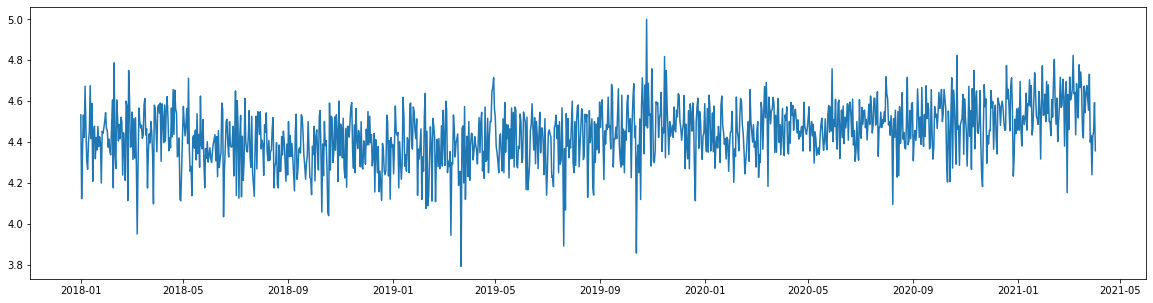

In [19]:
plt.figure(figsize = (20,5))
plt.plot(day_average)

### plotting average rating by week

In [29]:
data['Week'] = data['Timestamp'].dt.strftime("%Y-%U")
week_average = data.groupby(['Week']).mean()


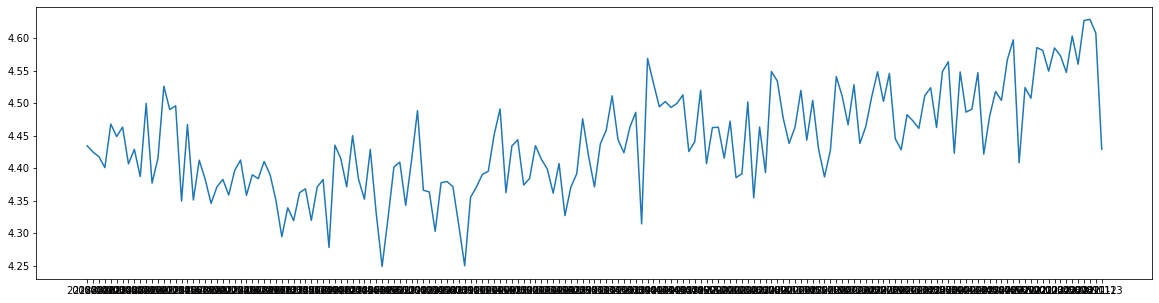

In [32]:
plt.figure(figsize = (20,5))
plt.plot(week_average)

### Plotting average rating by month

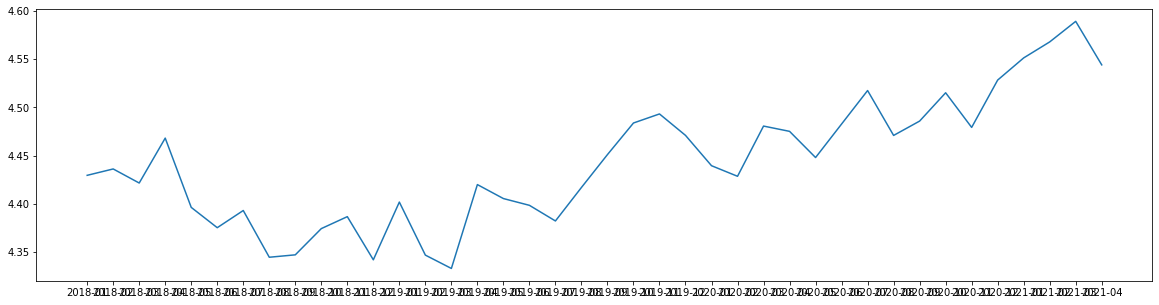

In [33]:
data['Month'] = data['Timestamp'].dt.strftime("%Y-%m")
month_average = data.groupby(['Month']).mean()

plt.figure(figsize = (20,5))
plt.plot(month_average)

### average rating per month per course

<AxesSubplot:xlabel='Month'>

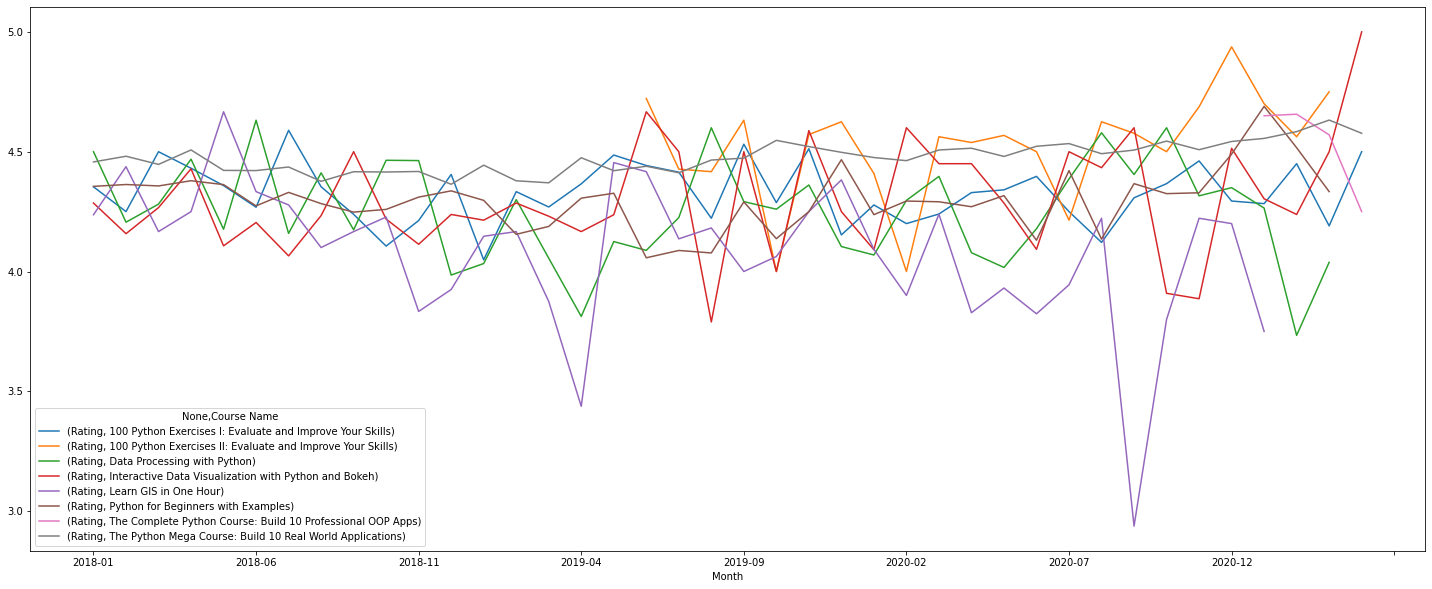

In [10]:
data['Month'] = data['Timestamp'].dt.strftime("%Y-%m")
month_average_cn = data.groupby(['Month','Course Name']).mean().unstack()
month_average_cn.plot(figsize=(25,10))

## What day are people the happiest?

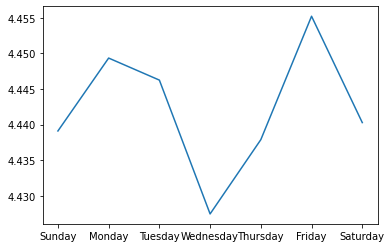

In [22]:
data['Weekday'] = data['Timestamp'].dt.strftime("%A")
data['Daynumber'] = data['Timestamp'].dt.strftime("%w")

weekday_average = data.groupby(['Weekday','Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')

weekday_average.index.get_level_values(0)
#weekday_average.plot(figsize = (20,7))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])